# Objectives


* To explore an existing dataset
> This week, we'll use the Iris dataset. You can read more about it here: https://scikit-learn.org/stable/datasets/toy_dataset.html.

* To apply k-nearest neighbour (kNN) and Bagging algorithms from Week 2 lecture to classification of Iris plants based on petal and sepal sizes.

# Section 1 - Load the Iris dataset

In [4]:
from sklearn import datasets

iris_data, iris_labels = datasets.load_iris(return_X_y=True, as_frame=False)

print("The dimensions of the Iris feature matrix", iris_data.shape)

The dimensions of the Iris feature matrix (150, 4)


# Section 2 - Explore the Iris dataset

* Read about the Iris dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html
* What type of labels does it have (real continuous or categorical)? What kind of machine learning task is this type of label suited to, i.e. classification or regression?
* What is the feature dimensionality of the dataset, i.e. the number of features?
* How many data instances are there? What is the distribution of instances across classes?



---


* Select one of the features. What association does the selected feature have with the iris classes, with respect to differentiating between them (Hint - use a search engine to read about Iris Setosa, Iris Versicolour, and Iris Virginica plant)?
* What factors do you think limited the number of data instances per class?
* How do you think the data was collected? What implication would this have for real world deployment of a model for automatic detection of iris classes based on this dataset?
* How do you think it was labelled? What kind of challenge might this pose for collection of more training data (and labels) for automatic detection of iris classes?

**Solution**

* The dataset has categorical labels, and so, classification is more appropriate for it, rather than regression.
* The Iris dataset has 4 features.
* There are 150 data instances, and an equal number of instances per class.

The last 4 sets of questions are open questions. You can discuss your thoughts with your peers or with a TA.


> **Note** - In good practice, machine learning (ML) development does not start with thinking about the learning algorithm but must begin with thinking about the real world problem that ML aims to address, as well as the dataset associated with the problem. You can listen here to an overview of the data-centric AI movement that encourages the approach of exploring and 'working on' the data (rather than only focusing on crafting the ML architecture) at the centre of developing a model for a given problem: https://datacentricai.org/blog/opening-remarks/.

# Section 3 - Split into training and test sets

In [8]:
import numpy

# Randomly split the data into 50:50 training:test sets
random_seed = 1
rng =  numpy.random.default_rng(random_seed)
rand_inds = numpy.arange(iris_labels.shape[0],)
rng.shuffle(rand_inds)
split_point = int(0.5*iris_labels.shape[0])

training_data = iris_data[rand_inds[0:split_point], :]
training_labels = iris_labels[rand_inds[0:split_point]]
test_data = iris_data[rand_inds[split_point:iris_labels.shape[0]], :]
test_labels = iris_labels[rand_inds[split_point:iris_labels.shape[0]]]

print("Size of the training data:", training_data.shape)
print("Size of the ttest data:", test_data.shape)

Size of the training data: (75, 4)
Size of the ttest data: (75, 4)


# Section 4 - Train and evaluate a kNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_kNN = KNeighborsClassifier(n_neighbors=5)
model_kNN.fit(training_data, training_labels)
test_predictions_kNN = model_kNN.predict(test_data)

print("\n What proportion of the kNN test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_kNN))


 What proportion of the kNN test predictions were correct? 0.99 


# Section 5 - Visually explore the data and predictions

* Use data visualization to explore how separable the three iris classes are.


**Solution**

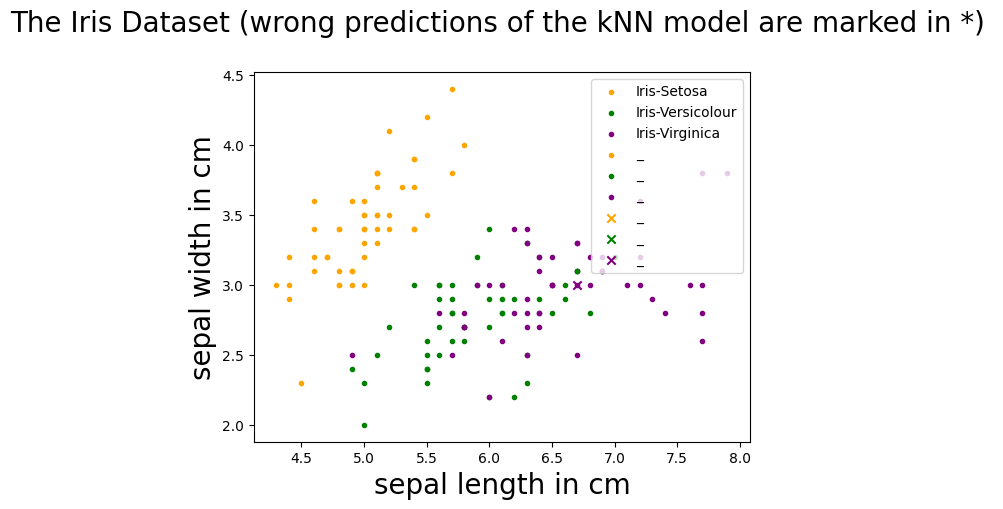

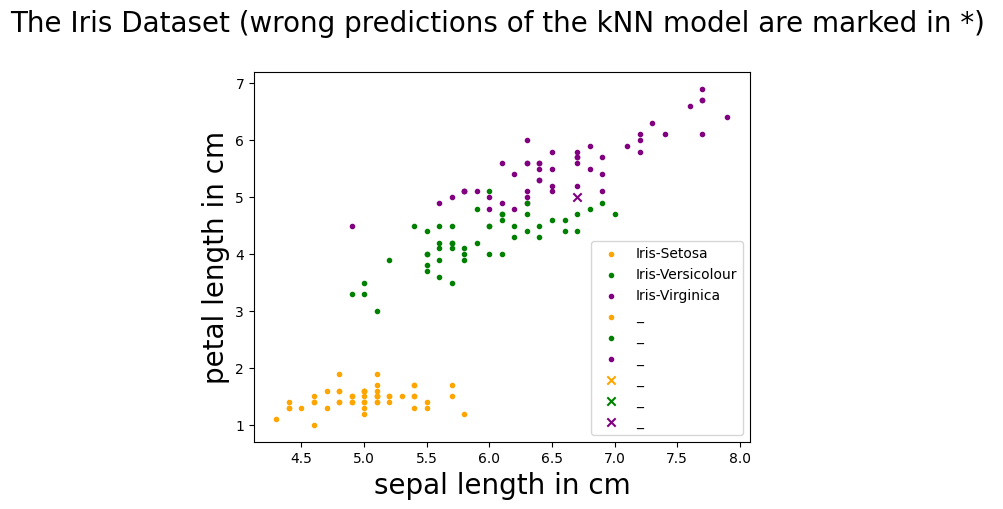

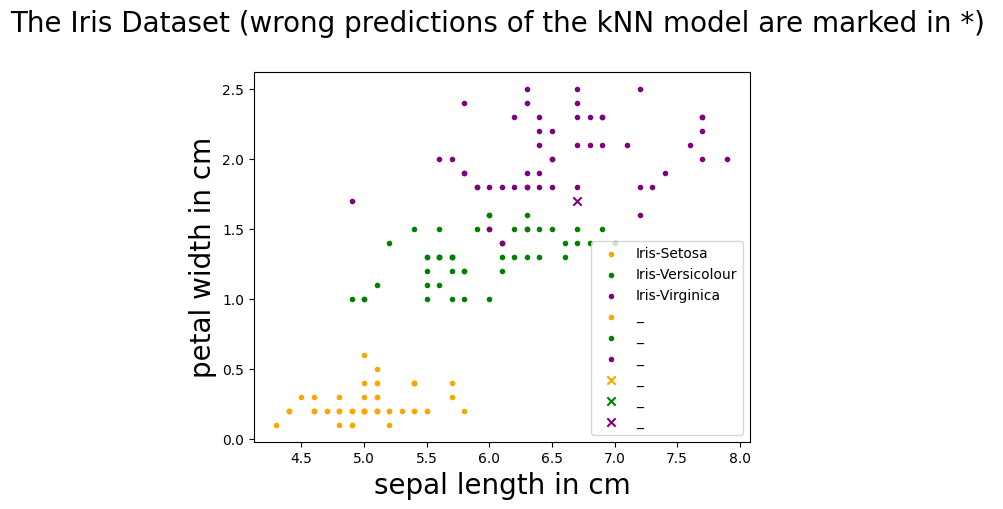

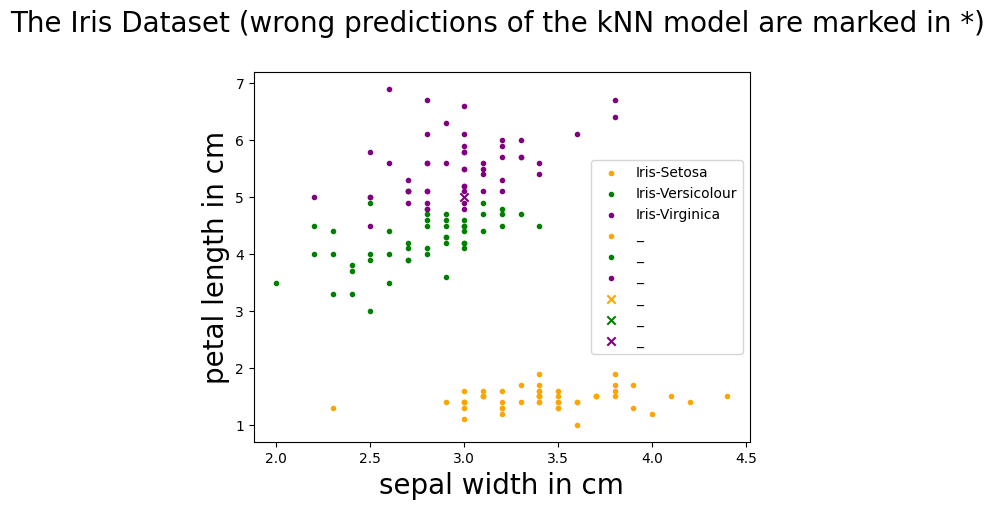

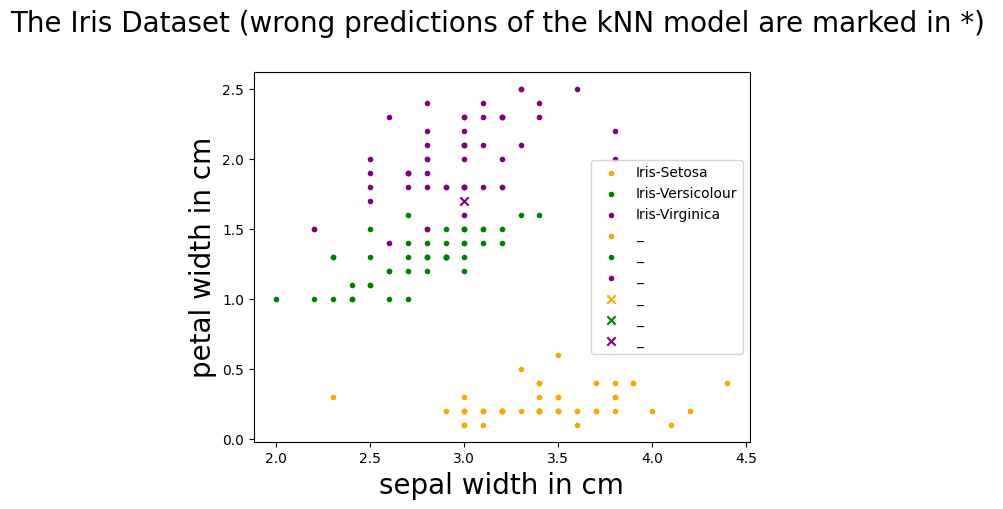

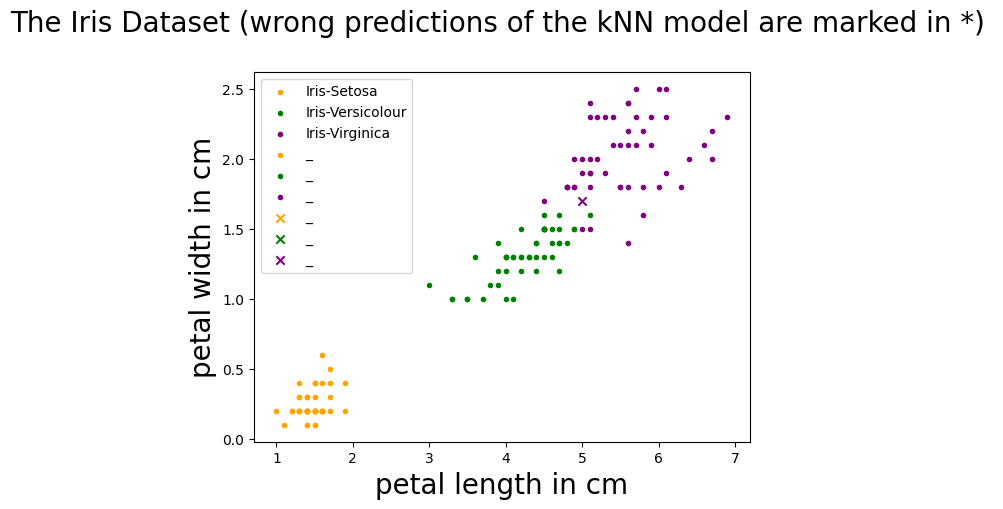

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import warnings


feature_names = ['sepal length in cm', 'sepal width in cm',
                 'petal length in cm', 'petal width in cm']

# Creating a method for plotting the 3 different classes by different colours
def plot_by_class(ax, data1, data2, labels, marker='.'):

  class_0 = labels == 0
  ax.scatter(data1[class_0], data2[class_0], color='orange', marker=marker, label='Iris-Setosa')

  class_1 = labels == 1
  ax.scatter(data1[class_1], data2[class_1], color='green', marker=marker, label='Iris-Versicolour')

  class_2 = labels == 2
  ax.scatter(data1[class_2], data2[class_2], color='purple', marker=marker, label='Iris-Virginica')

  return ax


# Setting up to plot only 2 of the 4 features at a time
# since it is impossible to create a 4D plot
for i in numpy.arange(0, iris_data.shape[1]):

  for j in numpy.arange(i, iris_data.shape[1]):


    if i != j:

      fig, ax = plt.subplots()

      # Plotting the training data
      # and colour coding by the labels
      ax = plot_by_class(ax, training_data[:, i], training_data[:, j], training_labels)

      # Plotting the test data
      # and differentiating between correct and incorrect predictions
      incorrect_pred = test_labels != test_predictions_kNN
      correct_pred = test_labels == test_predictions_kNN
      ax = plot_by_class(ax, test_data[correct_pred, i], test_data[correct_pred, j], test_labels[correct_pred])
      ax = plot_by_class(ax, test_data[incorrect_pred, i], test_data[incorrect_pred, j], test_predictions_kNN[incorrect_pred], marker='x')

      plt.xlabel(feature_names[i], size=20)
      plt.ylabel(feature_names[j], size=20)
      plt.title('The Iris Dataset (wrong predictions of the kNN model are marked in *) \n', size=20)
      print()

      with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.legend(labels=['Iris-Setosa', 'Iris-Versicolour',
                        'Iris-Virginica', '_',
                        '_', '_', '_', '_', '_'])

        plt.show()

* The above plots show that the Iris Setosa is considerably different from the other two species in petal and sepal size. The Iris Versicolour and Virginica are more similar in petal and sepal size, and they are hardly distinguishable by sepal size alone.
* The kNN with k=5 and distance metric as minowski result in wrong predictions at the petal/sepal size boundaries between the Iris Versicolour and Virginica.

# Section 6 - Explore the effect of the kNN hyperparameters

* Try different values of k, i.e. the number of nearest neighbours, e.g. k = 1, 2, 5, 10, 20. What effect of k do you notice?
* Try a different distance metric. See https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

**Solution**

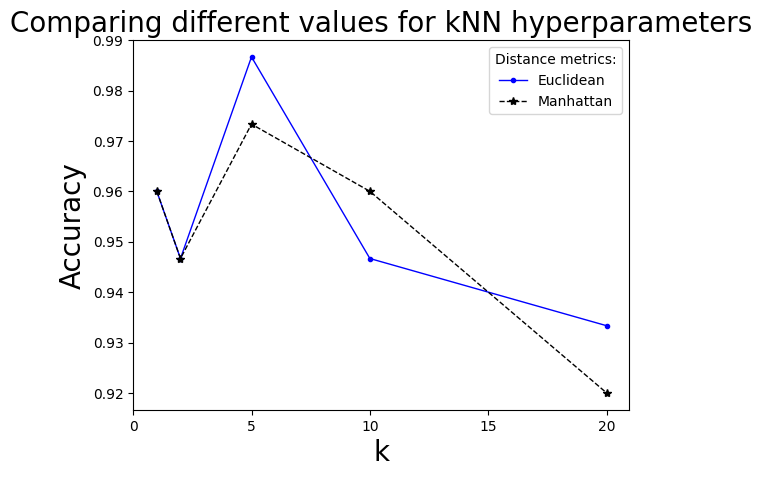

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set up different values of k
ks = [1, 2, 5, 10, 20]

# Initialize variables
acc_euclidean = numpy.zeros(len(ks),)
acc_manhattan = numpy.zeros(len(ks),)
counter = 0


for k in ks:

  # Train and evaluate kNN model with Euclidean distance metric
  model_kNN_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  model_kNN_euclidean.fit(training_data, training_labels)
  acc_euclidean[counter] = accuracy_score(test_labels, model_kNN_euclidean.predict(test_data))



  # Train and evaluate kNN model with Manhattan distance metric
  model_kNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  model_kNN_manhattan.fit(training_data, training_labels)
  acc_manhattan[counter] = accuracy_score(test_labels, model_kNN_manhattan.predict(test_data))

  counter += 1



# Plot data
plt.plot(ks, acc_euclidean, "b.-", linewidth=1, label='Euclidean')
plt.plot(ks, acc_manhattan, "k*--", linewidth=1, label='Manhattan')

plt.xlabel('k', size=20)
plt.xticks(numpy.arange(0, 21, step=5))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for kNN hyperparameters', size=20)
plt.legend(title='Distance metrics:')

plt.show()


As highlighted in Week 2 lecture, the number of neighbours and the distance metric of the kNN are its primary hyperparameters. Different hyperparamater settings might be optimal for different datasets. Thus, it is important to optimize them specifically for a given dataset.

# Section 7 - Train and evaluate a Bagging model

In [14]:
from sklearn.ensemble import BaggingClassifier
import math

# Set the max number of features to be used to split each node for each tree
max_feats = int(math.sqrt(training_data.shape[1]))

model_B = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B.fit(training_data, training_labels)
test_predictions_B = model_B.predict(test_data)


print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_B))


 What proportion of the Bagging test predictions were correct? 0.93 


# Section 8 - Explore the effect of the Bagging hyperparameters

* Try different numbers of base classifiers, i.e. trees, e.g. n = 1, 10, 100, 1000. What effect of the number of trees do you notice?

**Solution**

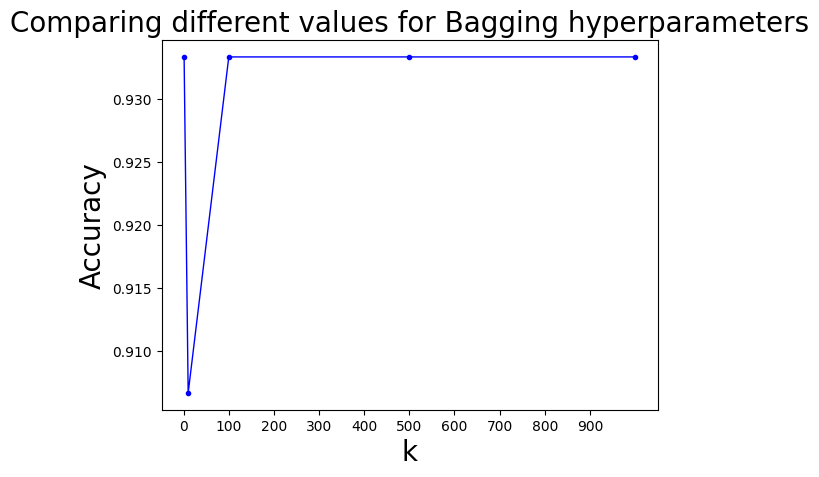

In [12]:
%matplotlib inline


# Set up different numbers of trees
ntrees = [1, 10, 100, 500, 1000]

# Initialize variables
acc_B = numpy.zeros(len(ntrees),)
counter = 0




for nt in ntrees:

  model_B = BaggingClassifier(n_estimators=nt, max_features=max_feats, random_state=random_seed)
  model_B.fit(training_data, training_labels)
  acc_B[counter] = accuracy_score(test_labels, model_B.predict(test_data))

  counter += 1



# Plot data
plt.plot(ntrees, acc_B, "b.-", linewidth=1)

plt.xlabel('k', size=20)
plt.xticks(numpy.arange(0, 1000, step=100))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for Bagging hyperparameters', size=20)

plt.show()



From the output above, all wrongly predicted data instances of the LR model are of class 1 (true label) and the model consistently predicts class 1 as the least likely class in each case. Class 1 represents the Iris Versicolour. Class 0 is Iris Setosa, and Class 2 is Iris Virginica.

# Section 9 - Explore split into training and test sets

* How was the Iris dataset split into training and test sets? See Section 3.
* Randomly split the dataset into training and test sets such that the ratio of instances is 80:20.
* What is the effect on performance of the Bagging algorithm?

**Solution**

In [16]:
# Randomly split the data into 80:20 training:test sets
random_seed = 1
rng =  numpy.random.default_rng(random_seed)
rand_inds = numpy.arange(iris_labels.shape[0],)
rng.shuffle(rand_inds)
split_point = int(0.8*iris_labels.shape[0])

training_data = iris_data[rand_inds[0:split_point], :]
training_labels = iris_labels[rand_inds[0:split_point]]
test_data = iris_data[rand_inds[split_point:iris_labels.shape[0]], :]
test_labels = iris_labels[rand_inds[split_point:iris_labels.shape[0]]]

print("Size of the training data:", training_data.shape)
print("Size of the ttest data:", test_data.shape)
print()

model_B2 = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B2.fit(training_data, training_labels)
test_predictions_B2 = model_B2.predict(test_data)

print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_B2))


Size of the training data: (120, 4)
Size of the ttest data: (30, 4)


 What proportion of the LR test predictions were correct? 0.97 


In Section 3, the Iris dataset was split into training and test sets 50:50. In the current section, the split is 80:20 which means that the training data is larger. The rule of the thumb is that more training data leads to better performance. However, there are factors that affect the efficacy of larger data, especially if the increase in data is not considerably high.